In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
study_results
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
data
# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
data[data.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
data[data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data[data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean" : mean,
                       "Median" : median,
                       "Variance" : variance,
                       "Standard Deviation" : standard_deviation,
                       "SEM" : sem})

# Assemble the resulting series into a single summary dataframe.
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
same_table = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
same_table.agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

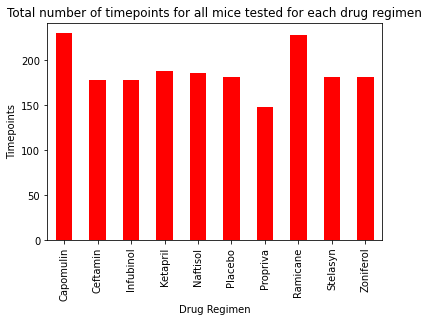

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_data = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
timepoints_data.plot(kind="bar", color="red")

plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

Text(0, 0.5, 'Timepoints')

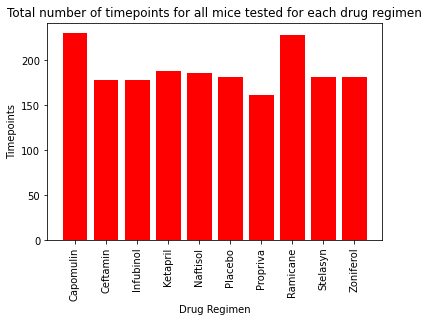

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(timepoints_data))

plt.bar(x_axis, timepoints, color="red", alpha=1, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

In [11]:
male_gender = clean_data[clean_data["Sex"] == "Male"]   
male_gender["Mouse ID"].nunique()

125

In [12]:
female_gender = clean_data[clean_data["Sex"] == "Female"]   
female_gender["Mouse ID"].nunique()

123

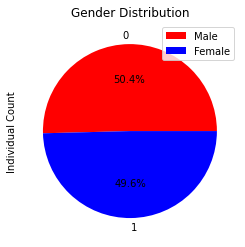

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = pd.DataFrame({"Individual Count" : [125, 123],
                        "Gender" : ["Male", "Female"]})
colors= ["red", "blue"]
explode = (0.1, 0)
pie_plot = pie_data.plot.pie(y="Individual Count", colors=colors, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.legend(["Male", "Female"])

Text(0.5, 1.0, 'Gender Distribution')

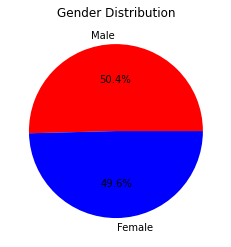

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
values = [125, 123]
colors= ["red", "blue"]
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Gender Distribution")

Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_regimens = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_regimens.sort_values(["Timepoint"], ascending=False)

four_regimens_df = four_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
four_regimens_df = four_regimens_df.sort_values(["Timepoint"], ascending=False)
four_regimens_df.head(10)

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
463,Infubinol,a203,45,67.973419
473,Infubinol,a251,45,65.525743
134,Capomulin,r554,45,32.377357
493,Ceftamin,a275,45,62.999356
124,Capomulin,y793,45,31.896238


In [16]:
max_tp = pd.DataFrame(clean_data.groupby("Mouse ID")["Timepoint"].max().sort_values().reset_index().rename(columns={"Timepoint" : "Max Timepoint"}))
max_tp
merged = pd.merge(four_regimens_df, max_tp, on="Mouse ID")
merged

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Max Timepoint
0,Infubinol,z581,45,62.754451,45
1,Infubinol,z581,40,60.053740,45
2,Infubinol,z581,35,58.628399,45
3,Infubinol,z581,30,56.286750,45
4,Infubinol,z581,25,54.316407,45
...,...,...,...,...,...
809,Infubinol,m756,0,45.000000,5
810,Ceftamin,x226,0,45.000000,0
811,Ceftamin,b447,0,45.000000,0
812,Ceftamin,t573,0,45.000000,0


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
volume_values = []

for drug in drugs:
    locate_drug = merged.loc[merged["Drug Regimen"] == drug]
    max_tp_df = locate_drug.loc[locate_drug["Timepoint"] == locate_drug["Max Timepoint"]]
    
    values = max_tp_df["Tumor Volume (mm3)"]
    volume_values.append(values)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = (values.loc[(max_tp_df["Tumor Volume (mm3)"] >= upper_bound) | (max_tp_df["Tumor Volume (mm3)"] <= lower_bound)]).count()

    
    print(f"The upper bound for {drug} is {upper_bound}")
    print(f"The lower bound for {drug} is {lower_bound}")
    print(f"The IQR for {drug} : {iqr}")
    
    
    print(f'Number of {drug} outliers: {outliers}')

The upper bound for Capomulin is 51.83201549
The lower bound for Capomulin is 20.70456164999999
The IQR for Capomulin : 7.781863460000004
Number of Capomulin outliers: 0
The upper bound for Ramicane is 54.30681135
The lower bound for Ramicane is 17.912664470000003
The IQR for Ramicane : 9.098536719999998
Number of Ramicane outliers: 0
The upper bound for Infubinol is 82.74144559000001
The lower bound for Infubinol is 36.83290494999999
The IQR for Infubinol : 11.477135160000003
Number of Infubinol outliers: 1
The upper bound for Ceftamin is 87.66645829999999
The lower bound for Ceftamin is 25.355449580000002
The IQR for Ceftamin : 15.577752179999997
Number of Ceftamin outliers: 0


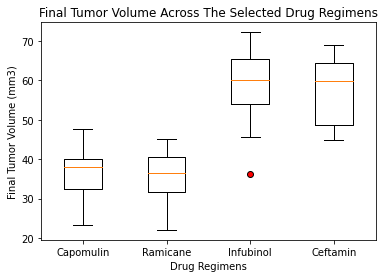

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_marker = dict(markerfacecolor="red")
plt.boxplot(volume_values, flierprops=outlier_marker)
plt.title("Final Tumor Volume Across The Selected Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
i557_data = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "i557",:]
i557_data = i557_data.sort_values(["Timepoint"], ascending=True)
i557_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


Text(0, 0.5, 'Tumor Volume(mm3)')

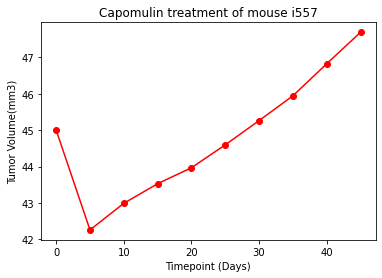

In [20]:
x_axis = i557_data["Timepoint"]
y_axis = i557_data["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, "ro", ls="-")
plt.title("Capomulin treatment of mouse i557")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume(mm3)")

Correlation and Regression


Text(0, 0.5, 'Average Tumor Volume(mm3)')

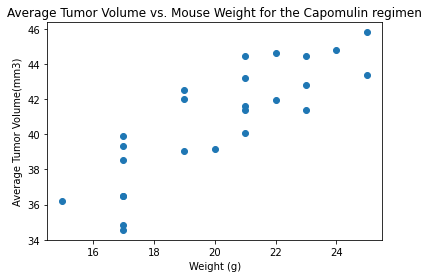

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_cap = Capomulin_data.groupby(["Mouse ID"]).mean()
x_axis = average_cap["Weight (g)"]
y_axis = average_cap["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)

plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

average_cap = Capomulin_data.groupby(["Mouse ID"]).mean()
x_axis = average_cap["Weight (g)"]
y_axis = average_cap["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_axis, y_axis)
print("The correlation between the mouse weight and average tumor volume for the Capomulin regimen is", correlation[0], ".")

result = st.linregress(x_axis, y_axis)
regress_values = x_axis * result.slope + result.intercept

print("Slope :", result.slope)
print("Intercept :", result.intercept)
print("R Value :", result.rvalue)
print("P Value :", result.pvalue)
print("Stderr Value :", result.stderr)

equation = "y = " + str(round(result.slope,2)) + "x + " + str(round(result.intercept,2))
print(equation)

The correlation between the mouse weight and average tumor volume for the Capomulin regimen is 0.8419363424694716 .
Slope : 0.9544396890241047
Intercept : 21.55216053268501
R Value : 0.841936342469472
P Value : 1.3225722434712478e-07
Stderr Value : 0.1275435903320133
y = 0.95x + 21.55


Text(16, 44, 'y = 0.95x + 21.55')

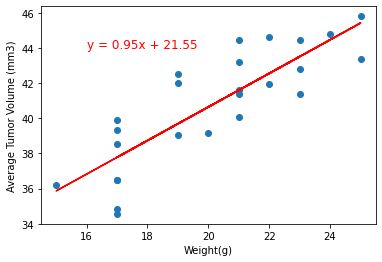

In [23]:
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(x_axis, regress_values, "r-")
plt.annotate(equation, (16,44), color="r", fontsize=12)

# Observations and Insights

1. The gender distribution between the mice concluded to be roughly equal with there being 2 more males than females, thus nullifying any gender bias for the dataset findings obtained.

2. In regards to the final tumour volume across the four selected drug regimens, only one outlier data point could be identified which was for Infubinol. Ceftamin provided the greatest IQR with a value of 15.58 whereas Capomulin had an IQR of 7.78, which was the lowest value out of all four drug regimens. 

3. The relationship between the average tumour volume and the mouse weight for the capomulin regimen was positive as it displayed a strong correlation with a correlation coefficient value of 0.84.